# Assigment 2 Starting Point

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [2]:
# define number of runners to take from each dataset
numRunnersToAnalyze = 100;

In [45]:
help(pd.read_fwf)

Help on function read_fwf in module pandas.io.parsers.readers:

read_fwf(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, colspecs: 'Sequence[tuple[int, int]] | str | None' = 'infer', widths: 'Sequence[int] | None' = None, infer_nrows: 'int' = 100, dtype_backend: 'DtypeBackend | lib.NoDefault' = <no_default>, **kwds) -> 'DataFrame | TextFileReader'
    Read a table of fixed-width formatted lines into DataFrame.
    
    Also supports optionally iterating or breaking of the file
    into chunks.
    
    Additional help can be found in the `online docs for IO Tools
    <https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html>`_.
    
    Parameters
    ----------
    filepath_or_buffer : str, path object, or file-like object
        String, path object (implementing ``os.PathLike[str]``), or file-like
        object implementing a text ``read()`` function.The string could be a URL.
        Valid URL schemes include http, ftp, s3, and file. For file 

In [44]:

test=pd.read_fwf('Women2018.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)

test.head()

,time,name,country,place,marathon,day,month
0,2:18:11,Gladys CHERONO,KEN,1,Berlin,16 SEP,NaN
1,2:18:31,Vivian CHERUIYOT,KEN,1,London,22 APR,NaN
2,2:18:34,Ruti AGA,ETH,2,Berlin,16 SEP,NaN
3,2:18:35,Brigid KOSGEI,KEN,1,Chicago,07 OCT,NaN
4,2:18:35,Ruth CHEPNGETICH,KEN,1,Istanbul,11 NOV,NaN


In [3]:
# read several datasets
data1=pd.read_fwf('Women2015.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data1['year']=2015
data1['gender']='F'
data2=pd.read_fwf('Women2019.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data2['year']=2019
data2['gender']='F'
data3=pd.read_fwf('Men2015.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data3['year']=2015
data3['gender']='M'
data4=pd.read_fwf('Men2019.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data4['year']=2019
data4['gender']='M'

# concatenate the data into one data frame
final=pd.concat([data1, data2, data3, data4])
final.head()

,time,name,country,place,marathon,day,month,year,gender
0,2:19:25,Gladys CHERONO,KEN,1,Berlin,27,SEP,2015,F
1,2:19:52,Mare DIBABA,ETH,1,Xiamen,3,JAN,2015,F
2,2:20:02,Aselefech MERGIA,ETH,1,Dubai,23,JAN,2015,F
3,2:20:03,Gladys CHERONO,KEN,2,Dubai,23,JAN,2015,F
4,2:20:21,Lucy Wangui KABUU,KEN,3,Dubai,23,JAN,2015,F


In [23]:
# get unique countries
countries = final.country.unique()
countries

array(['KEN', 'ETH', 'BRN', 'UKR', 'JPN', 'BLR', 'LAT', 'RUS', 'TUR',
       'POR', 'MAR', 'NED', 'SUI', 'CHN', 'FRA', 'NAM', 'ISR', 'USA',
       'GER', 'ITA', 'AUS', 'UGA', 'RSA', 'ERI', 'GBR', 'BEL', 'NOR'],
      dtype=object)

In [24]:
def timeToSeconds(time):
    temp=time.split(':')
    return 3600*int(temp[0])+60*int(temp[1])+int(temp[2])

In [25]:
final['seconds']=final['time'].apply(lambda x: timeToSeconds(x))

In [26]:
final.head()

,time,name,country,place,marathon,day,month,year,gender,seconds
0,2:19:25,Gladys CHERONO,KEN,1,Berlin,27,SEP,2015,F,8365
1,2:19:52,Mare DIBABA,ETH,1,Xiamen,3,JAN,2015,F,8392
2,2:20:02,Aselefech MERGIA,ETH,1,Dubai,23,JAN,2015,F,8402
3,2:20:03,Gladys CHERONO,KEN,2,Dubai,23,JAN,2015,F,8403
4,2:20:21,Lucy Wangui KABUU,KEN,3,Dubai,23,JAN,2015,F,8421


Output the file with time in seconds for use in KNIME

In [27]:
final.to_csv('outputforKNIME.csv')

In [28]:
groups=final.groupby(['year','gender']).describe()['seconds']

In [29]:
groups.head()

count     mean         std     min      25%     50%      75%  \
year gender                                                                 
2015 F       100.0  8680.72  111.784522  8365.0  8619.25  8682.0  8774.50   
     M       100.0  7647.51   62.861158  7440.0  7607.50  7662.5  7696.25   
2019 F       100.0  8534.72  121.842346  8044.0  8460.25  8566.0  8630.00   
     M       100.0  7552.71   70.937203  7301.0  7515.25  7572.5  7608.25   

                max  
year gender          
2015 F       8836.0  
     M       7733.0  
2019 F       8746.0  
     M       7635.0

In [30]:
import matplotlib.pyplot as plt

# create new plot and get axis


<Axes: xlabel='year'>

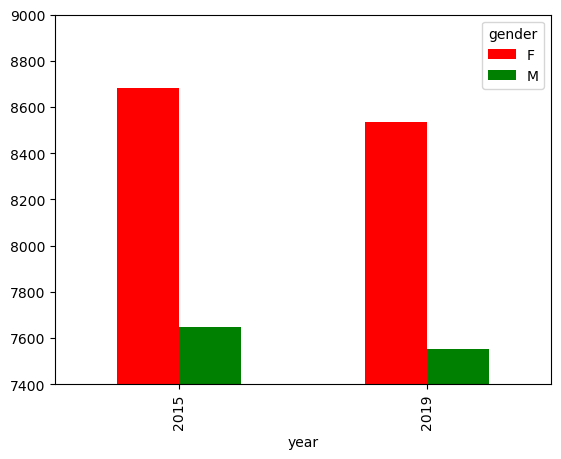

In [31]:
fig, ax = plt.subplots()
# change y range
ax.set_ylim(7400, 9000)
groups['mean'].unstack().plot(kind='bar', color=['red', 'green'], ax=ax)

In [32]:

help(groups['mean'].plot)

Help on PlotAccessor in module pandas.plotting._core object:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data) -> 'None'
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |

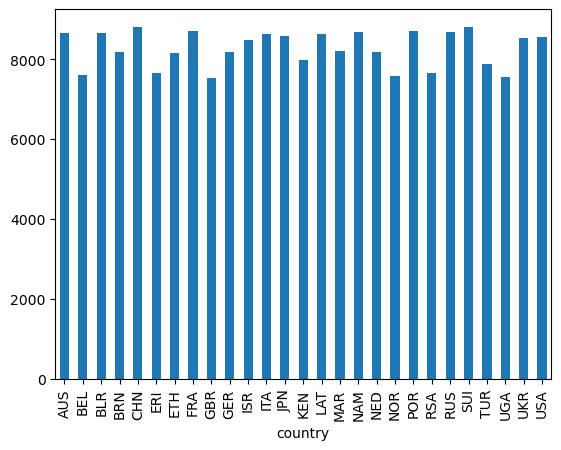

In [38]:
# groupby country
groups = final.groupby('country')['seconds'].mean().plot(kind='bar')